In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

c:\Users\Franco\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
df1 = pd.read_csv('D:/Curso Henry/Proyecto final/CSV_Tablas finales/Ventas.csv')
#df2 = pd.read_csv('D:/Curso Henry/Proyecto final/CSV_Tablas finales/Compras.csv')
#df3 = pd.read_csv('D:/Curso Henry/Proyecto final/CSV_Tablas finales/Detalle_compra.csv')
#df4 = pd.read_csv('D:/Curso Henry/Proyecto final/CSV_Tablas finales/Productos.csv')
df5 = pd.read_csv('D:/Curso Henry/Proyecto final/CSV_Limpiados/Copia de SalesFINAL12312016_Modificado.csv')

In [3]:
df1.head()

,InventoryId,Store,Brand,SalesQuantity,SalesDollars,SalesPrice,SalesDate,ExciseTax
0,1_HARDERSFIELD_1001,1,1001,1,"5,99","5,99",2016-08-05,0.05
1,1_HARDERSFIELD_1001,1,1001,1,"5,99","5,99",2016-08-12,0.05
2,1_HARDERSFIELD_1001,1,1001,1,"5,99","5,99",2016-08-20,0.05
3,1_HARDERSFIELD_1001,1,1001,1,"5,99","5,99",2016-08-29,0.05
4,1_HARDERSFIELD_1001,1,1001,1,"5,99","5,99",2016-09-08,0.05


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6412657 entries, 0 to 6412656
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   InventoryId    object 
 1   Store          int64  
 2   Brand          int64  
 3   SalesQuantity  int64  
 4   SalesDollars   object 
 5   SalesPrice     object 
 6   SalesDate      object 
 7   ExciseTax      float64
dtypes: float64(1), int64(3), object(4)
memory usage: 391.4+ MB


In [5]:
columnas_coma = ['SalesDollars', 'SalesPrice', 'ExciseTax', 'SalesQuantity']

for col in columnas_coma:
    df1[col] = df1[col].astype(str).str.replace(',', '.', regex=False)

In [6]:
# Convierte a float
df1['SalesDollars'] = pd.to_numeric(df1['SalesDollars'], errors='coerce')
df1['SalesPrice'] = pd.to_numeric(df1['SalesPrice'], errors='coerce')
df1['ExciseTax'] = pd.to_numeric(df1['ExciseTax'], errors='coerce')
df1['SalesQuantity'] = pd.to_numeric(df1['SalesQuantity'], errors='coerce')

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6412657 entries, 0 to 6412656
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   InventoryId    object 
 1   Store          int64  
 2   Brand          int64  
 3   SalesQuantity  int64  
 4   SalesDollars   float64
 5   SalesPrice     float64
 6   SalesDate      object 
 7   ExciseTax      float64
dtypes: float64(3), int64(3), object(2)
memory usage: 391.4+ MB


In [8]:
# Agrupamos las ventas totales por producto (puede ser por cantidad o por dinero, elegimos dólares)
ventas_por_producto = df1.groupby('Brand')['SalesDollars'].sum().sort_values(ascending=False)

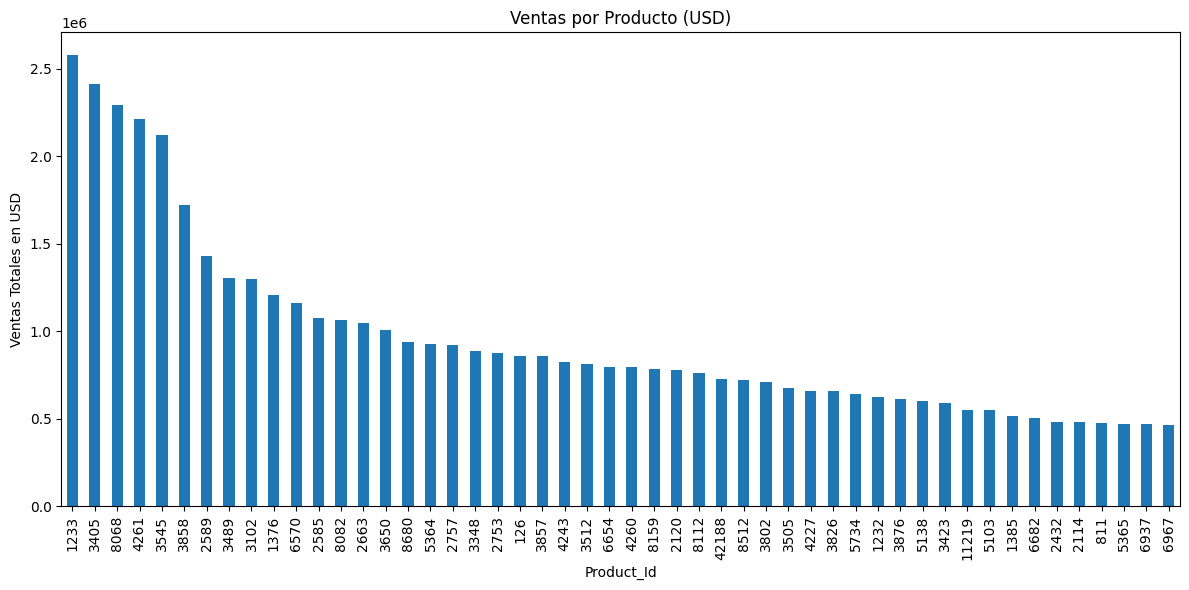

In [ ]:
plt.figure(figsize=(10,5))
ventas_por_producto.head(50).plot(kind='bar')
plt.title('Ventas por Producto (USD)')
plt.xlabel('Product_Id')
plt.ylabel('Ventas Totales en USD')
plt.tight_layout()
plt.show()

In [10]:
# Creamos un DataFrame desde la serie ordenada
df_abc = ventas_por_producto.reset_index()
df_abc.columns = ['Brand', 'SalesDollars']

# Ordenamos de mayor a menor
df_abc = df_abc.sort_values(by='SalesDollars', ascending=False).reset_index(drop=True)

# Calculamos el ranking por posición
n = len(df_abc)
df_abc['Rank'] = df_abc.index + 1

# Nueva función basada en posición y cantidad total
def clasificar_abc_por_cantidad(rank):
    if rank <= 0.2 * n:
        return 'A'
    elif rank <= 0.5 * n:
        return 'B'
    else:
        return 'C'

# Asignamos la categoría
df_abc['Category'] = df_abc['Rank'].apply(clasificar_abc_por_cantidad)

In [11]:
df_abc.head()

,Brand,SalesDollars,Rank,Category
0,1233,2579756.51,1,A
1,3405,2414562.01,2,A
2,8068,2295546.26,3,A
3,4261,2212958.41,4,A
4,3545,2121931.35,5,A


C:\Users\Franco\AppData\Local\Temp\ipykernel_2204\1212841527.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_abc, x='Category', order=['A', 'B', 'C'], palette='Set2')


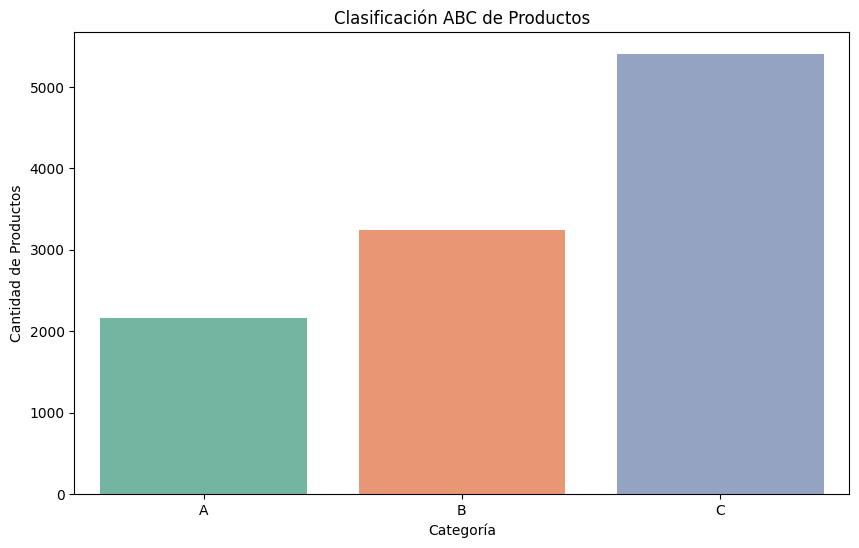

In [18]:
df_abc.head()  # Ver los primeros 10 productos

# También podrías visualizar todo en una tabla ordenada
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df_abc, x='Category', order=['A', 'B', 'C'], palette='Set2')
plt.title('Clasificación ABC de Productos')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Productos')
plt.show()

In [19]:
# Hacemos un join para traer el nombre del producto
df_abc = df_abc.merge(df5[['Brand','Description']], on='Brand', how='left')

In [20]:
print(df_abc[['Brand', 'Description', 'SalesDollars', 'Category']].head(10))

   Brand              Description  SalesDollars Category
0   1233  Jack Daniels No 7 Black    2579756.51        A
1   1233  Jack Daniels No 7 Black    2579756.51        A
2   1233  Jack Daniels No 7 Black    2579756.51        A
3   1233  Jack Daniels No 7 Black    2579756.51        A
4   1233  Jack Daniels No 7 Black    2579756.51        A
5   1233  Jack Daniels No 7 Black    2579756.51        A
6   1233  Jack Daniels No 7 Black    2579756.51        A
7   1233  Jack Daniels No 7 Black    2579756.51        A
8   1233  Jack Daniels No 7 Black    2579756.51        A
9   1233  Jack Daniels No 7 Black    2579756.51        A


In [21]:
df_abc = df_abc.drop_duplicates()

In [22]:
df_abc.head()

,Brand,SalesDollars,Rank,Category,Description
0,1233,2579756.51,1,A,Jack Daniels No 7 Black
9280,3405,2414562.01,2,A,Tito's Handmade Vodka
18532,8068,2295546.26,3,A,Absolut 80 Proof
27941,4261,2212958.41,4,A,Capt Morgan Spiced Rum
37156,3545,2121931.35,5,A,Ketel One Vodka


In [23]:
ventas_por_categoria = df_abc.groupby('Category')['SalesDollars'].sum().reset_index()



In [24]:
ventas_por_categoria['Category'] = pd.Categorical(
    ventas_por_categoria['Category'],
    categories=['A', 'B', 'C'],
    ordered=True
)
ventas_por_categoria = ventas_por_categoria.sort_values('Category')

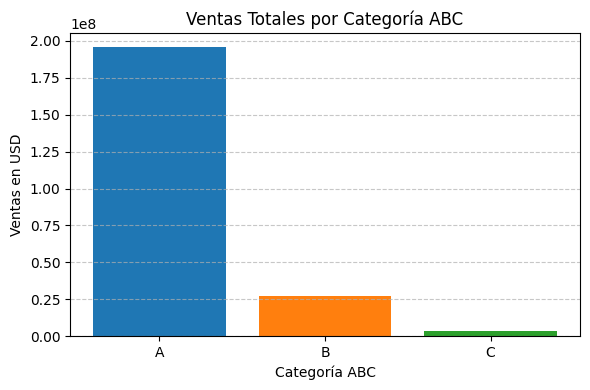

In [25]:
plt.figure(figsize=(6,4))
plt.bar(ventas_por_categoria['Category'], ventas_por_categoria['SalesDollars'],
        color=['#1f77b4', '#ff7f0e', '#2ca02c'])  # Colores A, B, C
plt.title('Ventas Totales por Categoría ABC')
plt.xlabel('Categoría ABC')
plt.ylabel('Ventas en USD')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

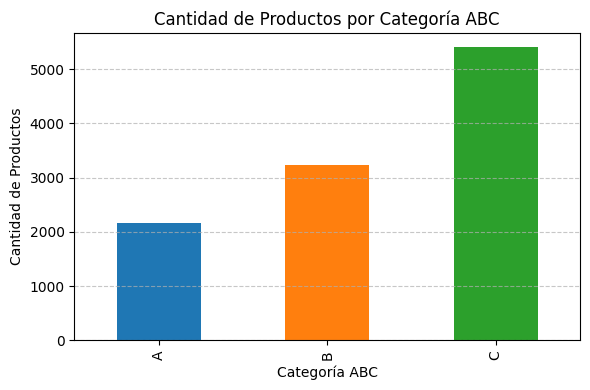

In [26]:
conteo_productos = df_abc['Category'].value_counts().reindex(['A', 'B', 'C'])

plt.figure(figsize=(6,4))
conteo_productos.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Cantidad de Productos por Categoría ABC')
plt.xlabel('Categoría ABC')
plt.ylabel('Cantidad de Productos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [27]:
#Ya hicimos toda la limpieza, guardamos
#df_abc.to_csv('Clasificaicon_ABC3.csv', index=False)